In [48]:
import pandas as pd
import numpy as np
import scikitplot.plotters as skplt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [123]:
def trans(str0):
    if str0 == False:
        return 0
    else:
        return 1
df = pd.read_csv('zillow_feature.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df['owner_occupied'] = df['owner_occupied'].apply(trans)
df

,address,num_units,num_bedrooms,value,longitude,latitude,owner_occupied,home_size,property_size,tax_value,zestimate_amount,zestimate_percentile,zestimate_valuationRange_low,zestimate_valuation_range_high,zestimate_value_change
0,89 LANCASTER AVE,1,3.000000,409100,-70.964655,42.439249,0,2226,4356,504100.0,520197,0,494187,551409,974
1,53 GOODWIN AVE,2,1.000000,362000,-70.967520,42.437260,1,2038,5413,409300.0,485277,0,436749,528952,-10309
2,19 GENEVA ST,2,2.500000,321200,-71.021106,42.425551,0,1951,4800,359600.0,443571,0,421392,465750,5941
3,48 DERBY RD,2,6.000000,546000,-71.016231,42.424494,1,2828,4999,607500.0,656415,0,623594,689236,1849
4,97 CREST AVE,1,3.000000,330100,-70.988138,42.396841,1,1620,4342,363100.0,407991,0,387591,428391,22959
5,37 AVALON ST,2,4.000000,345400,-70.992689,42.404296,0,2000,4356,408000.0,399192,0,355281,435119,3520
6,79 WOODLAND RD,2,1.500000,266100,-70.987523,42.427790,1,1332,5676,318700.0,359480,0,341506,377454,6239
7,200 CREST AVE,1,1.000000,112900,-70.984754,42.395423,1,528,1260,129900.0,240459,0,228436,254887,10385
8,9 AMBROSE ST,2,6.000000,364200,-71.008012,42.415932,1,1782,3351,410400.0,455152,0,432394,482461,7247
9,18 JARVIS ST,2,4.000000,387500,-71.024217,42.413851,1,3254,8000,436900.0,611799,0,581209,648507,-180


In [158]:
train_x = df.drop('owner_occupied', axis=1)
train_y = df['owner_occupied'].values
train_x = train_x.drop('address', axis=1)
#zscore 
train_x = train_x.drop('zestimate_percentile', axis=1)
train_x = train_x.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
train_y

array([0, 1, 0, ..., 1, 1, 1])

In [159]:
train_x = train_x.values
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
train_x=pca.fit_transform(train_x)

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x,train_y,test_size=0.3, random_state=12)

In [161]:
def evaluate_features(X, y, clf=None):
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)


In [162]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=18, verbose=1).fit(X_train, Y_train)
clf.score(X_test, Y_test)

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


0.7577403585008148

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.7s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   12.9s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   13.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   15.3s finished
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=DeprecationWarning)


Log loss: 0.5610806317514596
Accuracy: 0.754949918471931


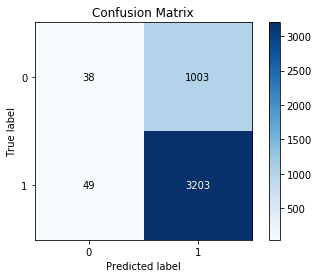

In [129]:
evaluate_features(X_train,Y_train,RandomForestClassifier(n_estimators=2000, max_depth=16, verbose=1))

In [130]:
from sklearn.svm import SVC
evaluate_features(X_train,Y_train,SVC())

JoblibAttributeError: JoblibAttributeError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x10fdd6270, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/jxtang/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/jxtan.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x10fdd6270, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/jxtang/anaconda3/lib/python3.6/site-packages/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/jxtan.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         self.io_loop = ioloop.IOLoop.current()
    477         try:
--> 478             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    479         except KeyboardInterrupt:
    480             pass
    481 
    482 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 3, 2, 34, 53, 860535, tzinfo=tzutc()), 'msg_id': 'e538b03402f84252899549871e50282f', 'msg_type': 'execute_request', 'session': '054e80c5f06241858ec3aeab1b8abb18', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e538b03402f84252899549871e50282f', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'054e80c5f06241858ec3aeab1b8abb18']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 3, 2, 34, 53, 860535, tzinfo=tzutc()), 'msg_id': 'e538b03402f84252899549871e50282f', 'msg_type': 'execute_request', 'session': '054e80c5f06241858ec3aeab1b8abb18', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e538b03402f84252899549871e50282f', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'054e80c5f06241858ec3aeab1b8abb18'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 4, 3, 2, 34, 53, 860535, tzinfo=tzutc()), 'msg_id': 'e538b03402f84252899549871e50282f', 'msg_type': 'execute_request', 'session': '054e80c5f06241858ec3aeab1b8abb18', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'e538b03402f84252899549871e50282f', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='from sklearn.svm import SVC\nevaluate_features(X_train,Y_train,SVC())', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Expr object>], cell_name='<ipython-input-130-395696765e90>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 117f020f0, execution_..._before_exec=None error_in_exec=None result=None>)
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])
   2855                 code = compiler(mod, cell_name, "single")
-> 2856                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x118e42540, file "<ipython-input-130-395696765e90>", line 2>
        result = <ExecutionResult object at 117f020f0, execution_..._before_exec=None error_in_exec=None result=None>
   2857                     return True
   2858 
   2859             # Flush softspace
   2860             if softspace(sys.stdout, 0):

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x118e42540, file "<ipython-input-130-395696765e90>", line 2>, result=<ExecutionResult object at 117f020f0, execution_..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x118e42540, file "<ipython-input-130-395696765e90>", line 2>
        self.user_global_ns = {'In': ['', 'import pandas as pd\nimport numpy as np', "df = pd.read_csv('features_ooc.csv')\ndf", "df = pd.read_csv('features_ooc.csv')\ndf.drop('Unnamed: 0', axis=1, inplace=True)\ndf", "df = pd.read_csv('features_ooc.csv')\ndf.drop('Unnamed: 0', axis=1, inplace=True)", 'df', "df['owner_occupied'].values", "train_x = df.drop('owner_occupied', axis=1)\ntrain_y = df['owner_occupied'].values", 'train_x', 'train_y', 'train_x', "train_x = df.drop('address', axis=1)\ntrain_x", 'train_x', "train_x = train_x.drop('address', axis=1)", 'train_x', "train_x = df.drop('owner_occupied', axis=1)\ntrain_y = df['owner_occupied'].values", "train_x = train_x.drop('address', axis=1)", "train_x = df.drop('owner_occupied', axis=1)\ntrai....values\ntrain_x = train_x.drop('address', axis=1)", 'train_x', 'train_x.as_matrix', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2:       Unnamed: 0              address  num_units...411961            True  

[6765 rows x 8 columns], 3:                   address  num_units  num_bedroo...411961            True  

[6765 rows x 7 columns], 5:                   address  num_units  num_bedroo...411961            True  

[6765 rows x 7 columns], 6: array([False,  True, False, ...,  True,  True,  True]), 8:                   address  num_units  num_bedroo...1193  
6764  42.411961  

[6765 rows x 6 columns], 9: array([False,  True, False, ...,  True,  True,  True]), 10:                   address  num_units  num_bedroo...1193  
6764  42.411961  

[6765 rows x 6 columns], 11:       num_units  num_bedrooms   value  longitude...2.411961            True

[6765 rows x 6 columns], 12:       num_units  num_bedrooms   value  longitude...2.411961            True

[6765 rows x 6 columns], 14:       num_units  num_bedrooms   value  longitude...2.411961            True

[6765 rows x 6 columns], ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, 'X_test': array([[ 0.25272263, -0.9569686 ,  0.01666996, ....  0.50233737,
         0.30282544, -1.94450042]]), 'X_train': array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]]), 'Y_test': array([1, 1, 1, ..., 1, 1, 1]), 'Y_train': array([0, 1, 1, ..., 0, 0, 1]), ...}
        self.user_ns = {'In': ['', 'import pandas as pd\nimport numpy as np', "df = pd.read_csv('features_ooc.csv')\ndf", "df = pd.read_csv('features_ooc.csv')\ndf.drop('Unnamed: 0', axis=1, inplace=True)\ndf", "df = pd.read_csv('features_ooc.csv')\ndf.drop('Unnamed: 0', axis=1, inplace=True)", 'df', "df['owner_occupied'].values", "train_x = df.drop('owner_occupied', axis=1)\ntrain_y = df['owner_occupied'].values", 'train_x', 'train_y', 'train_x', "train_x = df.drop('address', axis=1)\ntrain_x", 'train_x', "train_x = train_x.drop('address', axis=1)", 'train_x', "train_x = df.drop('owner_occupied', axis=1)\ntrain_y = df['owner_occupied'].values", "train_x = train_x.drop('address', axis=1)", "train_x = df.drop('owner_occupied', axis=1)\ntrai....values\ntrain_x = train_x.drop('address', axis=1)", 'train_x', 'train_x.as_matrix', ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {2:       Unnamed: 0              address  num_units...411961            True  

[6765 rows x 8 columns], 3:                   address  num_units  num_bedroo...411961            True  

[6765 rows x 7 columns], 5:                   address  num_units  num_bedroo...411961            True  

[6765 rows x 7 columns], 6: array([False,  True, False, ...,  True,  True,  True]), 8:                   address  num_units  num_bedroo...1193  
6764  42.411961  

[6765 rows x 6 columns], 9: array([False,  True, False, ...,  True,  True,  True]), 10:                   address  num_units  num_bedroo...1193  
6764  42.411961  

[6765 rows x 6 columns], 11:       num_units  num_bedrooms   value  longitude...2.411961            True

[6765 rows x 6 columns], 12:       num_units  num_bedrooms   value  longitude...2.411961            True

[6765 rows x 6 columns], 14:       num_units  num_bedrooms   value  longitude...2.411961            True

[6765 rows x 6 columns], ...}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, 'StratifiedKFold': <class 'sklearn.model_selection._split.StratifiedKFold'>, 'X_test': array([[ 0.25272263, -0.9569686 ,  0.01666996, ....  0.50233737,
         0.30282544, -1.94450042]]), 'X_train': array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]]), 'Y_test': array([1, 1, 1, ..., 1, 1, 1]), 'Y_train': array([0, 1, 1, ..., 0, 0, 1]), ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/Users/jxtang/Desktop/CS 506 project/<ipython-input-130-395696765e90> in <module>()
      1 from sklearn.svm import SVC
----> 2 evaluate_features(X_train,Y_train,SVC())

...........................................................................
/Users/jxtang/Desktop/CS 506 project/<ipython-input-127-99e467207053> in evaluate_features(X=array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]]), y=array([0, 1, 1, ..., 0, 0, 1]), clf=SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False))
      1 def evaluate_features(X, y, clf=None):
      2     if clf is None:
      3         clf = LogisticRegression()
      4     
      5     probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
----> 6                               n_jobs=-1, method='predict_proba', verbose=2)
      7     pred_indices = np.argmax(probas, axis=1)
      8     classes = np.unique(y)
      9     preds = classes[pred_indices]
     10     print('Log loss: {}'.format(log_loss(y, probas)))

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in cross_val_predict(estimator=SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), X=array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]]), y=array([0, 1, 1, ..., 0, 0, 1]), groups=None, cv=StratifiedKFold(n_splits=3, random_state=8, shuffle=False), n_jobs=-1, verbose=2, fit_params=None, pre_dispatch='2*n_jobs', method='predict_proba')
    675     # independent, and that it is pickle-able.
    676     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    677                         pre_dispatch=pre_dispatch)
    678     prediction_blocks = parallel(delayed(_fit_and_predict)(
    679         clone(estimator), X, y, train, test, verbose, fit_params, method)
--> 680         for train, test in cv.split(X, y, groups))
        cv.split = <bound method StratifiedKFold.split of StratifiedKFold(n_splits=3, random_state=8, shuffle=False)>
        X = array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]])
        y = array([0, 1, 1, ..., 0, 0, 1])
        groups = None
    681 
    682     # Concatenate the predictions
    683     predictions = [pred_block_i for pred_block_i, _ in prediction_blocks]
    684     test_indices = np.concatenate([indices_i

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_val_predict.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
AttributeError                                     Mon Apr  2 22:34:54 2018
PID: 58357                 Python 3.6.4: /Users/jxtang/anaconda3/bin/python
...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_predict>, (SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]]), array([0, 1, 1, ..., 0, 0, 1]), array([1361, 1362, 1371, ..., 4290, 4291, 4292]), array([   0,    1,    2, ..., 1450, 1452, 1453]), 2, None, 'predict_proba'), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_predict>
        args = (SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]]), array([0, 1, 1, ..., 0, 0, 1]), array([1361, 1362, 1371, ..., 4290, 4291, 4292]), array([   0,    1,    2, ..., 1450, 1452, 1453]), 2, None, 'predict_proba')
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py in _fit_and_predict(estimator=SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False), X=array([[ 0.25272263,  1.02341077,  1.40212414, .... -0.16551311,
        -0.16655897,  0.03379479]]), y=array([0, 1, 1, ..., 0, 0, 1]), train=array([1361, 1362, 1371, ..., 4290, 4291, 4292]), test=array([   0,    1,    2, ..., 1450, 1452, 1453]), verbose=2, fit_params={}, method='predict_proba')
    749 
    750     if y_train is None:
    751         estimator.fit(X_train, **fit_params)
    752     else:
    753         estimator.fit(X_train, y_train, **fit_params)
--> 754     func = getattr(estimator, method)
        func = undefined
        estimator = SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False)
        method = 'predict_proba'
    755     predictions = func(X_test)
    756     if method in ['decision_function', 'predict_proba', 'predict_log_proba']:
    757         n_classes = len(set(y))
    758         if n_classes != len(estimator.classes_):

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py in predict_proba(self=SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False))
    585         The probability model is created using cross validation, so
    586         the results can be slightly different than those obtained by
    587         predict. Also, it will produce meaningless results on very small
    588         datasets.
    589         """
--> 590         self._check_proba()
        self._check_proba = <bound method BaseSVC._check_proba of SVC(C=1.0,...one, shrinking=True,
  tol=0.001, verbose=False)>
    591         return self._predict_proba
    592 
    593     def _predict_proba(self, X):
    594         X = self._validate_for_predict(X)

...........................................................................
/Users/jxtang/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py in _check_proba(self=SVC(C=1.0, cache_size=200, class_weight=None, co...None, shrinking=True,
  tol=0.001, verbose=False))
    552     # probability=False using properties. Do not use this in new code; when
    553     # probabilities are not available depending on a setting, introduce two
    554     # estimators.
    555     def _check_proba(self):
    556         if not self.probability:
--> 557             raise AttributeError("predict_proba is not available when "
    558                                  " probability=False")
    559         if self._impl not in ('c_svc', 'nu_svc'):
    560             raise AttributeError("predict_proba only implemented for SVC"
    561                                  " and NuSVC")

AttributeError: predict_proba is not available when  probability=False
___________________________________________________________________________

In [97]:
Y_train

array([False,  True,  True, ..., False, False,  True])